In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/Neuronal/")

In [3]:
adata = sc.read_h5ad("Neuronal.bySample.n10.filtered.bbknn_umap_leiden_marker.res1.5.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

In [4]:
## add meta data
meta_data = pd.read_csv("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/01.preprocess/cell_meta/ibd_meta_data_cells.csv", header=0)
meta_data.index = meta_data.cellName

select = meta_data[meta_data.index.isin(adata.obs.index.to_list())]
select = select.loc[adata.obs.index,:]

adata.obs["location2"] = pd.Categorical(select.location2)
adata.obs["location1"] = pd.Categorical(select.location1)
adata.obs["developmentStage"] = pd.Categorical(select.developmentStage)

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


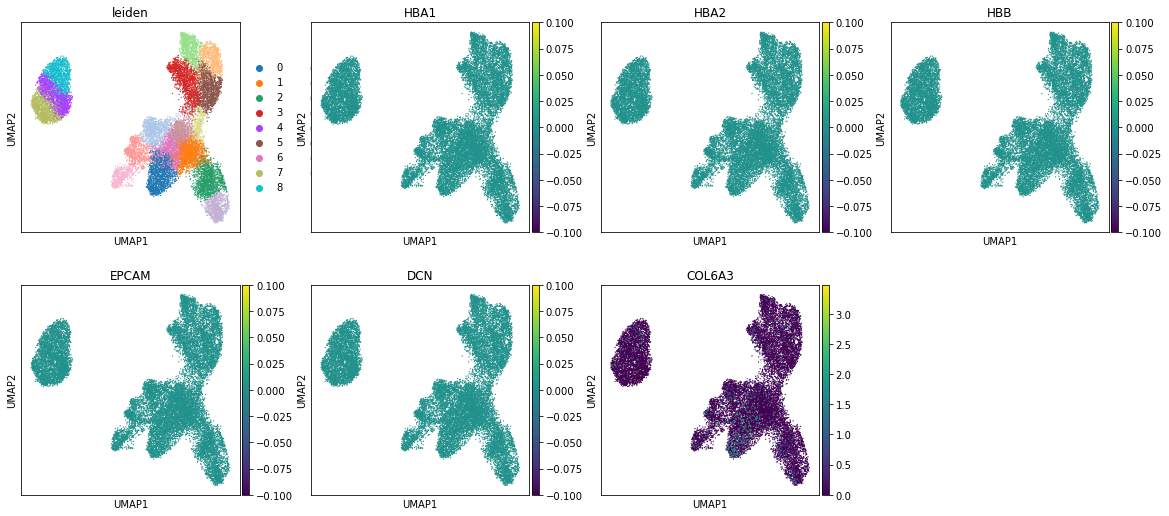

In [5]:
## plot gene expression in umap
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=['leiden',"HBA1","HBA2","HBB","EPCAM","DCN","COL6A3"])

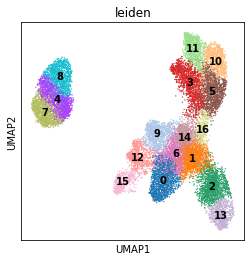

In [6]:
## plot gene expression in umap
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=['leiden'],legend_loc = 'on data')

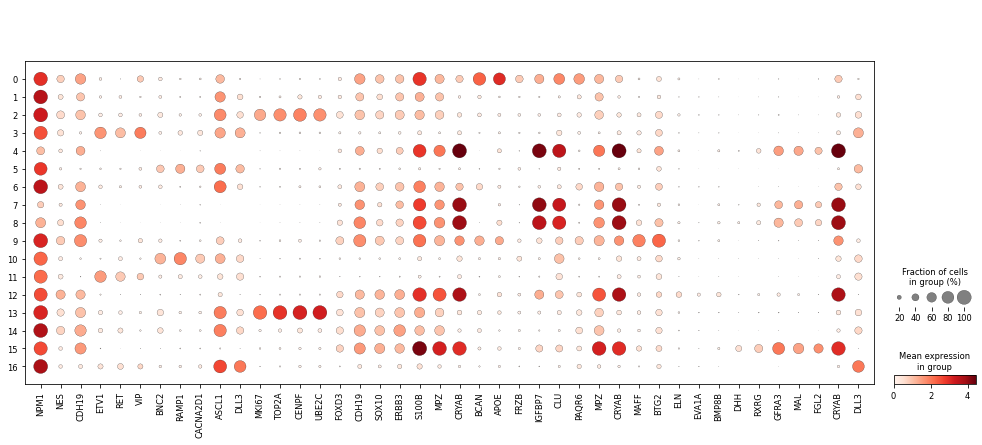

In [7]:
major_markers = [
                 "NPM1","NES","CDH19", ## common
                 "ETV1","RET","VIP", ## Neuronal/Branch A
                 "BNC2","RAMP1","CACNA2D1",## Neuronal/Branch B
                 "ASCL1","DLL3", ##Neuroblast
                 "MKI67","TOP2A","CENPF","UBE2C",## Cycling ENCC/glia 
                 "FOXD3","CDH19","SOX10","ERBB3","S100B","MPZ","CRYAB", # NCC/glia progenitor
                 "BCAN","APOE","FRZB",## Fetal glia 3
                 "IGFBP7","CLU","PAQR6",## Adult glia
                 "MPZ","CRYAB","MAFF","BTG2", ## Differentiating glia
                 "ELN","EVA1A","BMP8B", ## Feal glia 2
                 "DHH","RXRG","GFRA3","MAL","FGL2", ## Fetal glia 1
    "CRYAB","DLL3"
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden')

In [8]:
## rename cluster
adata.obs["label"] = "Unknown"
adata.obs.loc[adata.obs.leiden.isin(['3','11']), "label"] = "Neuronal/Branch A"
adata.obs.loc[adata.obs.leiden.isin(['5','10']), "label"] = "Neuronal/Branch B"
adata.obs.loc[adata.obs.leiden.isin(['16']), "label"] = "Neuroblast"
adata.obs.loc[adata.obs.leiden.isin(['2','13']), "label"] = "Cycling ENCC/glia"
adata.obs.loc[adata.obs.leiden.isin(['1','6','14']), "label"] = "ENCC/glia progenitor"

adata.obs.loc[adata.obs.leiden.isin(['9']), "label"] = "Differentiating glia"
adata.obs.loc[adata.obs.leiden.isin(['15']), "label"] = "Fetal glia 1"
adata.obs.loc[adata.obs.leiden.isin(['12']), "label"] = "Fetal glia 2"
adata.obs.loc[adata.obs.leiden.isin(['0']), "label"] = "Fetal glia 3"
adata.obs.loc[adata.obs.leiden.isin(['4','7','8']), "label"] = "Adult glia"

newOrder = ['Neuronal/Branch A','Neuronal/Branch B','Neuroblast',
             'Cycling ENCC/glia','ENCC/glia progenitor',
            'Differentiating glia','Fetal glia 1','Fetal glia 2','Fetal glia 3','Adult glia'
           ]
adata.obs.label =pd.Categorical(adata.obs.label)
adata.obs.label = adata.obs.label.cat.set_categories( newOrder )

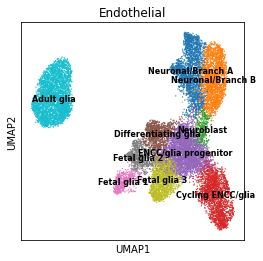

In [9]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='label', legend_loc='on data', title='Endothelial', frameon=True, legend_fontsize = 8)

In [ ]:
adata.obs["major"] = "Neuronal"

In [ ]:
adata = adata.raw.to_adata()

In [ ]:
del adata.obs["location1"]
del adata.obs["location2"]
del adata.obs["developmentStage"]

In [ ]:
#adata.var.index = [ x.replace("-","_") for x in adata.var.index.to_list()]

In [ ]:
adata.write_h5ad("Neuronal.clean.h5ad")

In [ ]:
adata.write_loom("Neuronal.clean.loom", write_obsm_varm=True)

In [ ]:
## done